In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm, datasets 
from sklearn.model_selection import train_test_split 
iris = datasets.load_iris() 
from sklearn.model_selection import GridSearchCV

C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [2]:
X, y = iris.data[:, :2], iris.target 
# On conserve 50% du jeu de données pour l'évaluation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [3]:
C = 1.0 # paramètre de régularisation 
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train)

C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [4]:
print(lin_svc.score(X_test, y_test))

0.64


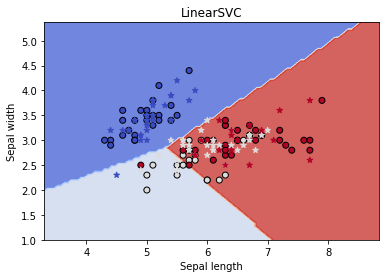

In [5]:
# Créer la surface de décision discretisée 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h 
h = max((x_max - x_min) / 100, (y_max - y_min) / 100) 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 

# Surface de décision 
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) 
# Afficher aussi les points d'apprentissage 
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm) 
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm) 
plt.xlabel('Sepal length') 
plt.ylabel('Sepal width') 
plt.title("LinearSVC") 
plt.show()

C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


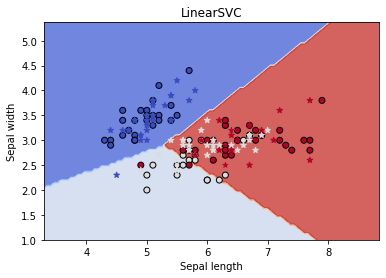

In [6]:
C = 9.0 # paramètre de régularisation 
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train)

# Créer la surface de décision discretisée 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h 
h = max((x_max - x_min) / 100, (y_max - y_min) / 100) 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 

# Surface de décision 
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) 
# Afficher aussi les points d'apprentissage 
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm) 
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm) 
plt.xlabel('Sepal length') 
plt.ylabel('Sepal width') 
plt.title("LinearSVC") 
plt.show()

In [7]:
# SVM pour tous les donnees de Iris
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)

C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


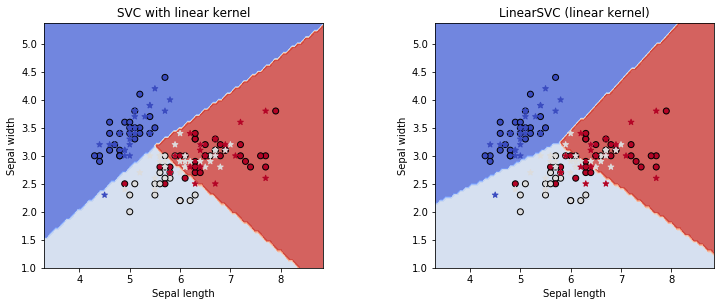

In [8]:
# SVM pour tous les donnees de Iris
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train) 
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train) 
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)'] 
fig = plt.figure(figsize=(12, 4.5)) 
for i, clf in enumerate((svc, lin_svc)):    
    plt.subplot(1, 2, i + 1)     
    plt.subplots_adjust(wspace=0.4, hspace=0.4)     
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])     
    # Utiliser une palette de couleurs     
    Z = Z.reshape(xx.shape)     
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)     
    # Afficher aussi les points d'apprentissage     
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)     
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)     
    plt.xlabel('Sepal length')     
    plt.ylabel('Sepal width')     
    plt.title(titles[i]) 
plt.show() 

In [9]:
X, y = iris.data, iris.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
C = 1.0 # paramètre de régularisation 
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train)
print(lin_svc.score(X_test, y_test))

0.92


C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
# jeu de donnees digits
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\datasets\base.py:549: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = data[:, -1].astype(np.int, copy=False)


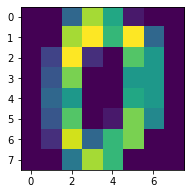

In [11]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], interpolation="nearest")
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
C=1.0
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train)

C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [14]:
print(lin_svc.score(X_test, y_test))

0.9537037037037037


In [15]:
X.size

115008

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

In [17]:
values_of_C = [1.0, 2.0, 3.0, 5.0]
parameters={'C':values_of_C}
model = svm.LinearSVC()
grid_search = GridSearchCV(estimator=model,param_grid=parameters,verbose=True)
grid_search.fit(X_train, y_train)

C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecat

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:794: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\imsam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\imsam\Anaconda3\lib\site-pac

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None, param_grid={'C': [1.0, 2.0, 3.0, 5.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [18]:
print("Meilleur paramètres à choisir : {} ".format(grid_search.best_params_))
print("Meilleur score obtenu : {} ".format(grid_search.best_score_))

Meilleur paramètres à choisir : {'C': 1.0} 
Meilleur score obtenu : 0.9217877094972067 
